In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dados_teste.csv")

In [3]:
df

,Consumidor,Produto,Qualidade,Preço,Design
0,11,B,8,5,9
1,10,B,7,4,5
2,17,D,7,8,5
3,8,A,7,9,9
4,19,E,8,8,5
...,...,...,...,...,...
95,19,B,4,6,7
96,4,D,6,4,9
97,2,C,4,8,6
98,10,A,8,5,8


In [4]:
features = ['Qualidade', 'Preço', 'Design']
X = df[features]

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [7]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Produto'] = df['Produto']

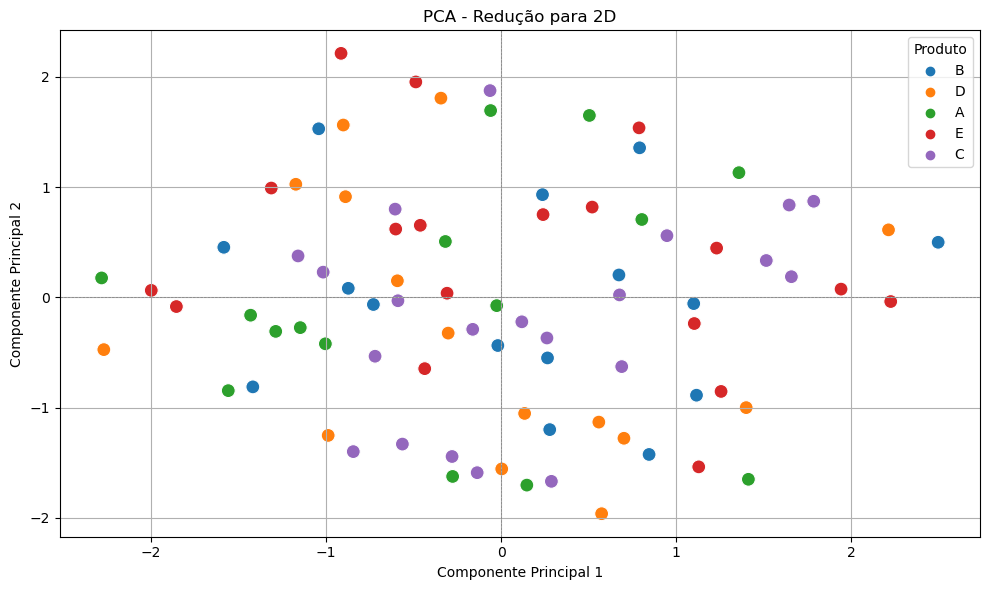

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Produto', s=100, palette='tab10')
plt.title('PCA - Redução para 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend(title='Produto')
plt.tight_layout()
plt.show()

In [9]:
print(pca.explained_variance_ratio_)  # mostra quanto da variabilidade foi mantida

[0.43011122 0.30940333]


In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

/Users/emersonmouco/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/emersonmouco/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_scaled, df['Produto'])

RandomForestClassifier()

In [13]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)
print(loadings)

                PC1       PC2
Qualidade -0.448449 -0.889852
Preço      0.640909 -0.254633
Design    -0.623000  0.378583


In [14]:
# Dicionário de mapeamento
mapa_produtos = {
    'A': 'Produto Econômico',
    'B': 'Produto Intermediário',
    'C': 'Produto Premium',
    'D': 'Produto de Luxo',
    'E': 'Produto Inovador'
}

# Aplicar a substituição
df['Produto Nomeado'] = df['Produto'].map(mapa_produtos)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

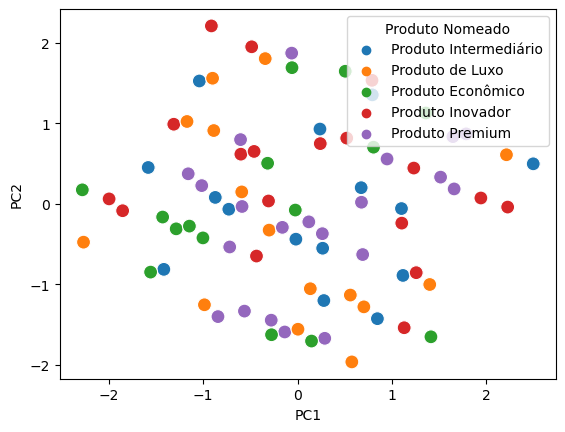

In [15]:
df_pca['Produto Nomeado'] = df['Produto'].map(mapa_produtos)

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Produto Nomeado', palette='tab10', s=100)

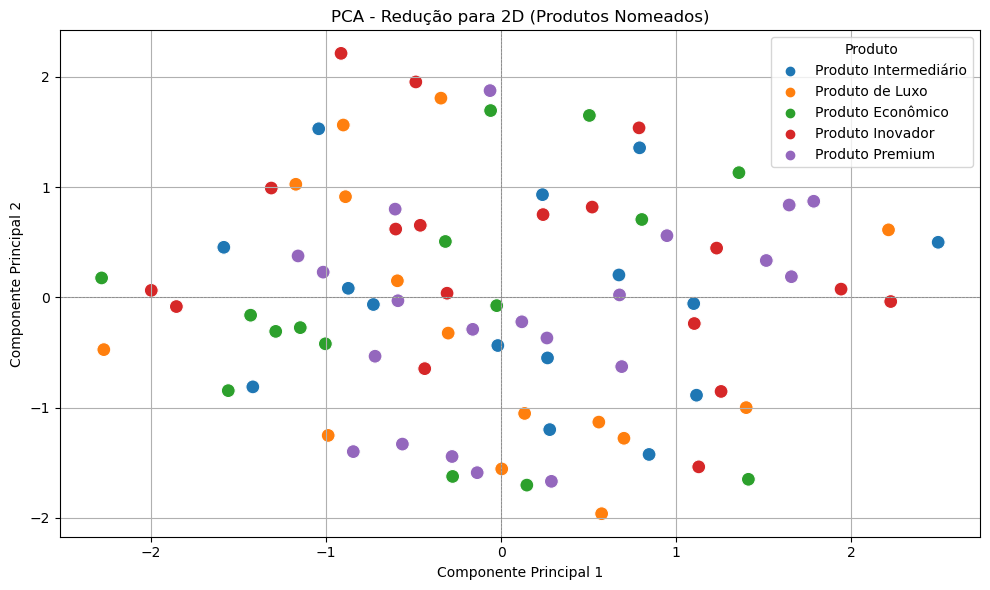

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Produto Nomeado', palette='tab10', s=100)
plt.title('PCA - Redução para 2D (Produtos Nomeados)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.legend(title='Produto')
plt.tight_layout()
plt.show()

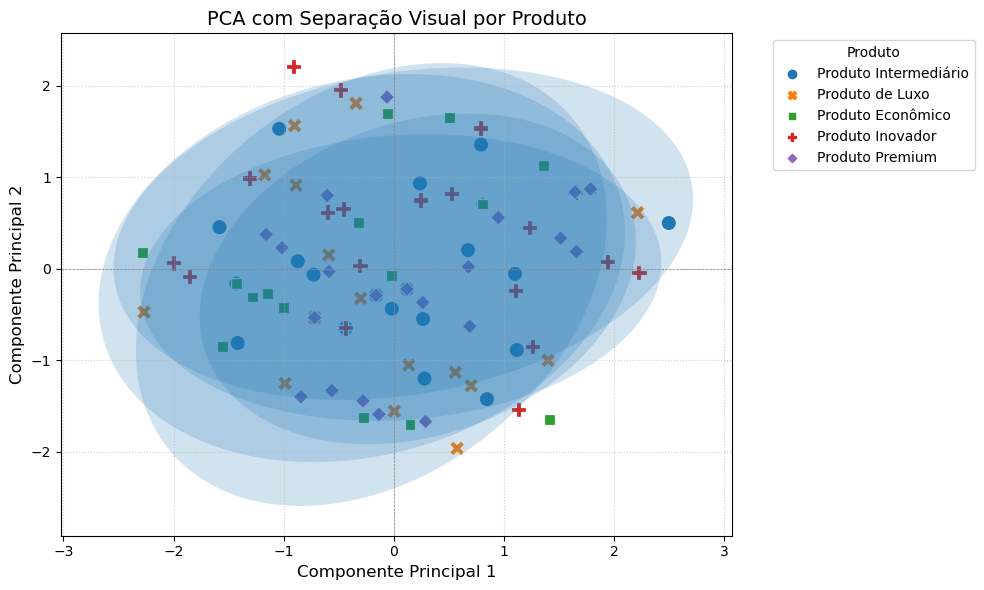

In [17]:
import matplotlib.patches as mpatches
import numpy as np

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Produto Nomeado', style='Produto Nomeado', palette='tab10', s=120)

# Adicionando elipses por grupo
for nome, grupo in df_pca.groupby('Produto Nomeado'):
    ellipse = plt.scatter(grupo['PC1'], grupo['PC2'], alpha=0)  # usado só pra capturar os dados
    cov = np.cov(grupo[['PC1', 'PC2']].T)
    mean = grupo[['PC1', 'PC2']].mean().values
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)
    ell = mpatches.Ellipse(xy=mean, width=lambda_[0]*4, height=lambda_[1]*4,
                           angle=np.rad2deg(np.arccos(v[0, 0])), alpha=0.2)
    plt.gca().add_patch(ell)

plt.title('PCA com Separação Visual por Produto', fontsize=14)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(title='Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
